# Easy explain for image classification: Use as a package for multiple targets

### Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import torchvision
import sys
import os

# Set up paths
module_path = os.path.abspath(os.path.join("../../"))
if module_path not in sys.path:
    sys.path.append(module_path)

from easy_explain.methods.occlusion.occlusion import OcclusionExplain

Let's load our model. We will use the Resnet50 from torchvision models

In [3]:
model = torchvision.models.resnet50(pretrained=True).eval()


Let's also Initialise the Occlusion method

In [4]:
occlusion_explain = OcclusionExplain(model=model)

Let's suppose that we do not want to do the explanation for the predicted class but for another class. In the below example we use class 7 which is "cock". 

In [5]:
image_url = "https://unsplash.com/photos/aGQMKvPiBN4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8M3x8c3F1aXJyZWwlMjBtb25rZXl8ZW58MHx8fHwxNjc1NzczNTIy&force=true"  # URL to the image you want to explain
total_preds = 5  # Number of top predictions to consider
vis_types = [["blended_heat_map", "original_image"], ["blended_heat_map", "original_image"], ["alpha_scaling", "original_image"]]
vis_signs = [["positive","all"], ["negative","all"], ["positive","all"]]
labels_path = "imagenet_class_index.json"  # Path to the labels JSON file
target = 7

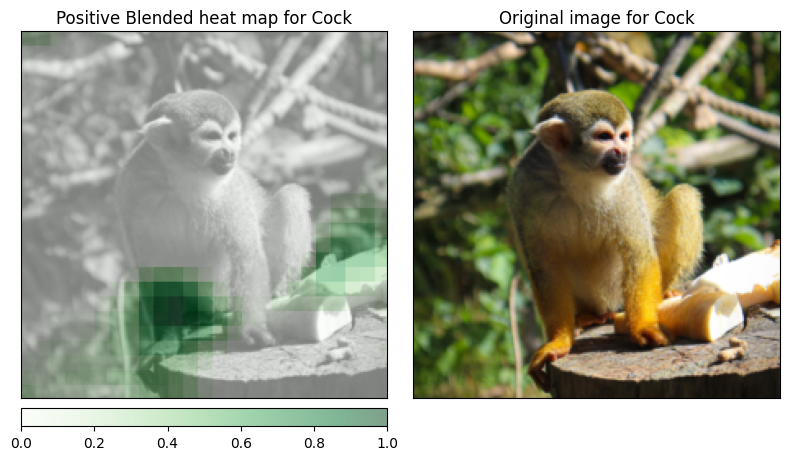

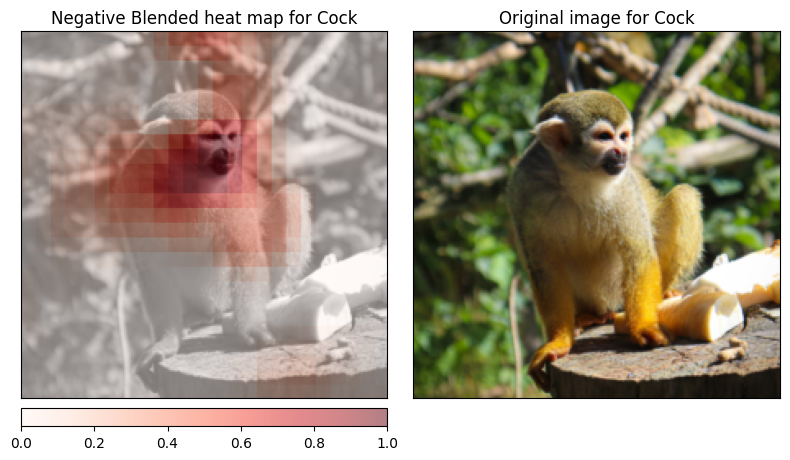

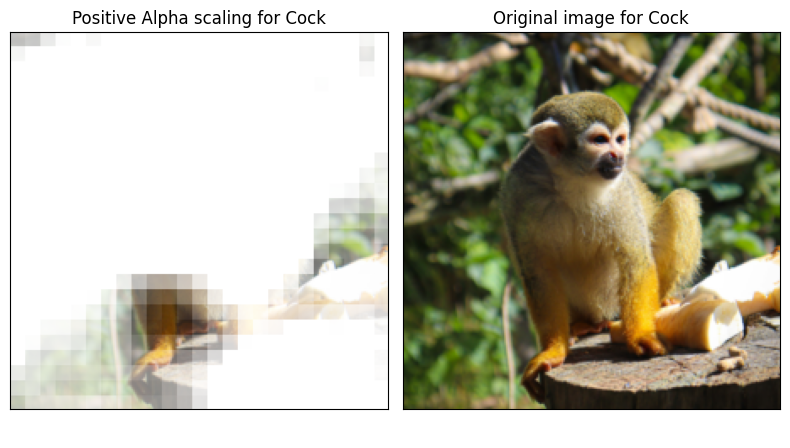

In [6]:
occlusion_explain.generate_explanation(
    image_url=image_url,
    total_preds=total_preds,
    vis_types=vis_types,
    vis_signs=vis_signs,
    labels_path=labels_path,
    target = target
)

We can see that the head said that the image does not contain a cock. If we look at the last part and the positive one, the one leg was something that could be explained as a cock.

Let's do the same for another image. This time the image will include two different classes inside.
The one will be the Siberian_husky (250) and the other one will be a Persian_cat (283)

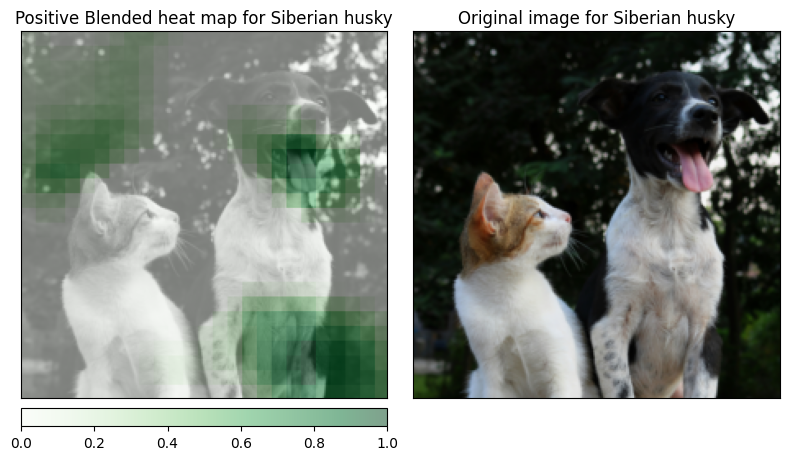

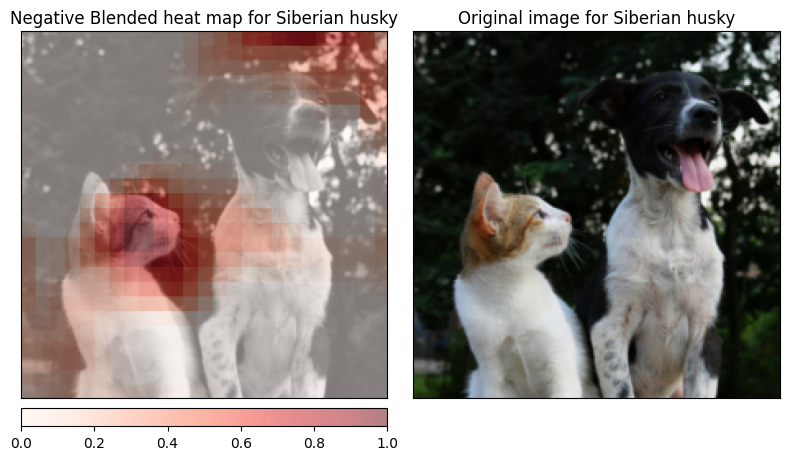

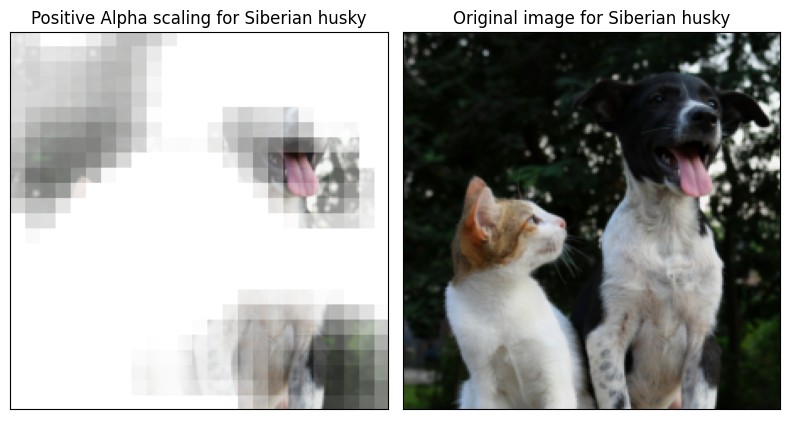

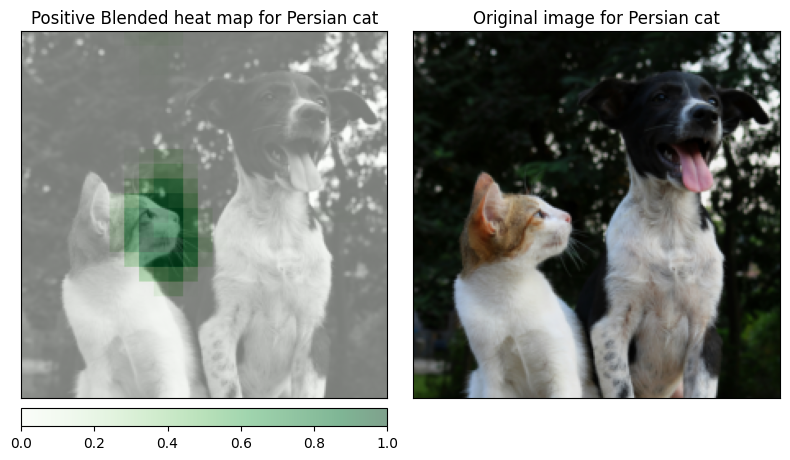

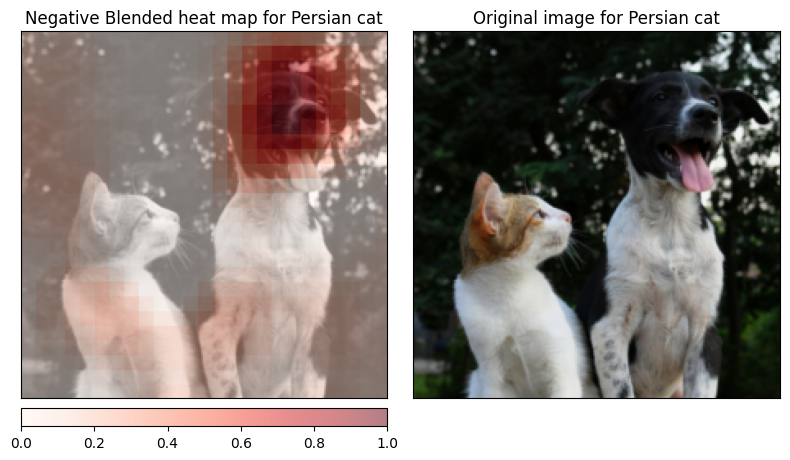

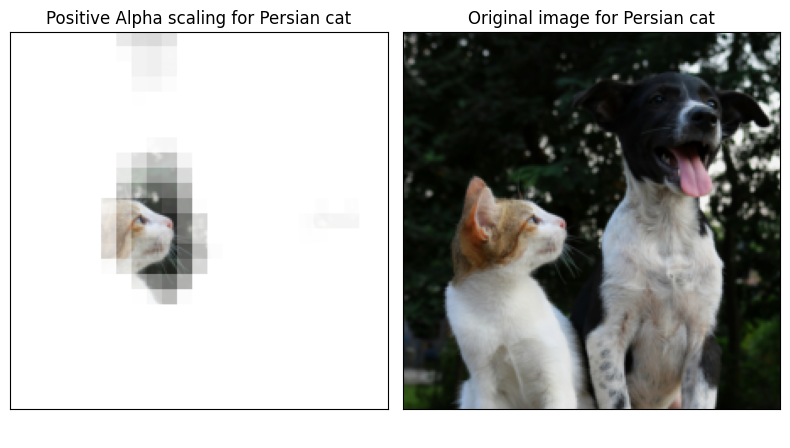

In [8]:
vis_types=[["blended_heat_map", "original_image"], ["blended_heat_map", "original_image"], ["alpha_scaling", "original_image"]]
vis_signs = [["positive","all"], ["negative","all"], ["positive","all"]]
image_url = "https://unsplash.com/photos/ppKcYi1CXcI/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8Mnx8ZG9nJTIwYW5kJTIwbW91c2V8ZW58MHx8fHwxNjc2Mjk5ODQ2&force=true"
target=250
occlusion_explain.generate_explanation(
    image_url=image_url,
    total_preds=total_preds,
    vis_types=vis_types,
    vis_signs=vis_signs,
    labels_path=labels_path,
    target = target
)

target=283
occlusion_explain.generate_explanation(
    image_url=image_url,
    total_preds=total_preds,
    vis_types=vis_types,
    vis_signs=vis_signs,
    labels_path=labels_path,
    target = target
)